# Manual model 3
Our third model improves our fit slightly, compared to models 1 and 2, although a lot of variance in our data remains unexplained.

### Parameters

In [2]:
a = 0.15
b = 0.00

### Import

In [12]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

### Fonts

In [13]:
csfont = {'fontname':'Georgia'}
hfont = {'fontname':'Helvetica'}

### Load Data

In [14]:
data = pd.read_csv('../../data/healthcare_cost/insurance.csv')
columns = data.columns
x_orig = data.iloc[:,0].values
y_orig = data.iloc[:,-1].values

### Clean Dataset for the univariate example

In [15]:
ind0 = np.where(y_orig > 17000)[0]
ind1 = np.where(x_orig < 46)[0]
ind2 = np.where(y_orig > 10000)[0]
ind3 = np.intersect1d(ind1,ind2)
ind4 = np.union1d(ind3,ind0)
ind5 = range(x_orig.shape[0])
ind5 = np.setdiff1d(ind5,ind4)
x_orig = x_orig[ind5].astype('float')
y_orig = y_orig[ind5].astype('float')

### Random Sample

In [16]:
np.random.seed(200)
idx = np.random.randint(0,x_orig.shape[0],20)
x = x_orig[idx]
y = y_orig[idx] / 1000.0

### Compute all Three Sum of Squares and R-square

In [17]:
x0 = 10
x1 = 70
y0 = a*x0 + b
y1 = a*x1 + b
y_pred = a*x + b
y_mean = np.mean(y)
SST = np.sum((y - np.mean(y))**2)
SSR = np.sum((y_pred - np.mean(y))**2)
SSE = np.sum((y - y_pred)**2)
rsquared = SSR/SST

### Show Contributions of SSR, SST and SSE

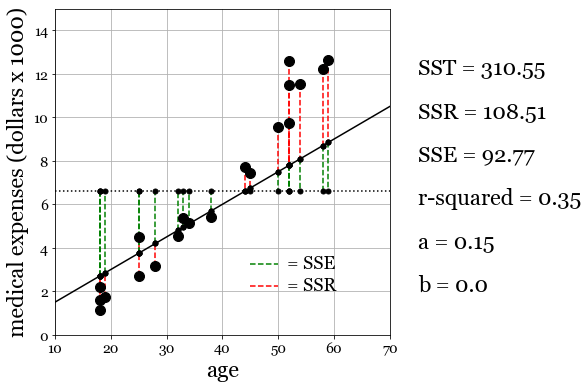

In [21]:
plt.figure(figsize=(6,6));
plt.scatter(x,y,c='k',s=100,zorder=1010);
plt.plot([x0,x1],[y0,y1],'k',zorder=100);
plt.plot([x0,x1],[y_mean,y_mean],'k:',zorder=100);
for idx in range(len(x)):
    plt.plot([x[idx],x[idx]],[y[idx],y_pred[idx]],'r--') #SS Error
    plt.plot([x[idx],x[idx]],[y_pred[idx],y_mean],'g--') #SS Regression
    plt.scatter(x[idx],y_pred[idx],s=25,color='k',zorder=1000)
    plt.scatter(x[idx],y_pred[idx],s=25,color='k',zorder=1000)
    plt.scatter(x[idx],y_mean,s=25,color='k',zorder=1000)
plt.grid();
plt.xlabel('age',fontsize=22,**csfont);
plt.ylabel('medical expenses (dollars x 1000)',fontsize=22,**csfont);
plt.xticks(fontsize=14,**csfont);
plt.yticks(fontsize=14,**csfont);
plt.text(75,12,"SST = " + str(np.round(SST,2)),fontsize=22,**csfont);
plt.text(75,10,"SSR = " + str(np.round(SSR,2)),fontsize=22,**csfont);
plt.text(75,8,"SSE = " + str(np.round(SSE,2)),fontsize=22,**csfont);
plt.text(75,6,"r-squared = " + str(np.round(rsquared,2)),fontsize=22,**csfont);
plt.text(75,4,"a = " + str(np.round(a,2)),fontsize=22,**csfont);
plt.text(75,2,"b = " + str(np.round(b,2)),fontsize=22,**csfont);
plt.plot([45,50],[2.25,2.25],'r--')
plt.plot([45,50],[3.25,3.25],'g--')
plt.text(51.5,3.05,"= SSE",color='k',fontsize=18,**csfont);
plt.text(51.5,2.05,"= SSR",color='k',fontsize=18,**csfont);
plt.axis((10,70,0,15));
plt.savefig('../../assets/figures/014/manual_model3.png', dpi=300,bbox_inches="tight")